In [1]:
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
pl.style.use('seaborn')
sns.set_style('whitegrid')

import scatterer

## Random scattering medium example

In [7]:
wavelength = 632.8E-3
scattering_degree = 2
g_percent = [1.0]
bounds = np.array([[-5, 5], [-5, 5], [-0.5, 0.5]])
surround_index = 1.33
radius = 0.06969697
size_param = 2 * np.pi * radius * surround_index / wavelength
print(f'size param: {size_param}')
structure = 'random'
particle_index = 2.488  # polystyrene in water

# initialize scattering medium
scat_medium = scatterer.RandomScatteringMedium(bounds=bounds,
                                               particle_radii=radius,
                                               size_param=size_param,
                                               scattering_degree=scattering_degree,
                                               particle_index=particle_index,
                                               env_index=surround_index,
                                               no_overlaps=False)

size param: 0.9204049313406849
ANISOTROPY: 0.20562588055084635
ENV INDEX: 1.33
PARTICLE INDEX: 2.488
scattering efficiency: 0.4511756849359603
number of scatterers: 2904
{'bounds': array([[-5. ,  5. ],
       [-5. ,  5. ],
       [-0.5,  0.5]]), 'depth': 1.0, 'width': 10.0, 'height': 10.0, 'volume': 100.0, 'structure': 'random', 'particle_radii': array([0.06969697, 0.06969697, 0.06969697, ..., 0.06969697, 0.06969697,
       0.06969697]), 'particle_index': 2.488, 'particle_size_param': 0.9204049313406849, 'size_param': 0.9204049313406849, 'thetarange': array([-180.        , -179.63963964, -179.27927928, -178.91891892,
       -178.55855856, -178.1981982 , -177.83783784, -177.47747748,
       -177.11711712, -176.75675676, -176.3963964 , -176.03603604,
       -175.67567568, -175.31531532, -174.95495495, -174.59459459,
       -174.23423423, -173.87387387, -173.51351351, -173.15315315,
       -172.79279279, -172.43243243, -172.07207207, -171.71171171,
       -171.35135135, -170.99099099, -17

In [3]:
xs, ys, zs = scat_medium.particle_centers

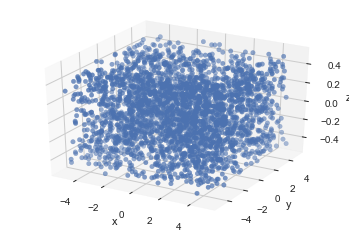

In [4]:
fig = pl.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel(r'x')
ax.set_ylabel(r'y')
ax.set_zlabel(r'z')
pl.savefig('random.png', dpi=300)

In [5]:
new_angles = scat_medium.gen_mie(size=1000)
new_angles = new_angles

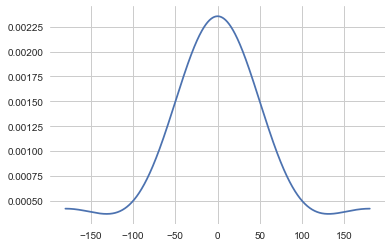

In [6]:
pl.plot(scat_medium.thetarange, scat_medium.scat_dist)